# Code to compare two tickers

In [1]:
case = 1

In [2]:
# S&P500 vs ZSP

if case == 1:
    tickers = 'ZEQ.TO','ZGRO.TO' # comme le S&P500 mais avec +3%
if case == 2:
    tickers = 'ZSP-U.TO','^SPX' # comme le S&P500 mais avec +3%
if case == 3:
    tickers = 'ZSP.TO','ZSP-U.TO' # comme le S&P500 mais avec +3%
if case == 4:
    tickers = 'ZSP.TO','ZLU.TO' # comme le S&P500 mais avec +3%
if case == 5:
    tickers = 'ZEA.TO','ZWE.TO' # comme le S&P500 mais avec +3%
if case == 6:
    tickers = 'ZGQ.TO','ZNQ.TO' #
if case == 7:
    tickers = 'ZPAY.TO','^SPX' # dispersion très basse, principalement des dividendes
if case == 8:
    tickers = 'ZWG.TO','ZSP.TO' # dispersion très basse, principalement des dividendes
if case == 9:
    tickers = 'ZWE.TO','^SPX' # dispersion très basse, principalement des dividendes
if case == 10:
    tickers = 'ZLU.TO','ZCN.TO'
if case == 11:
    tickers = 'ZGLD.TO','XGD.TO'
if case == 12:
    tickers = '^SPX','XGD.TO'
if case == 13:
    tickers = 'DRFC.TO','^SPX'
if case == 14:
    tickers = 'GEV.TO','ZLU.TO'
if case == 15:
    tickers = 'BKCL.TO','EBNK.TO'
if case == 16:
    tickers = 'ZEA.TO','^SPX'       
if case == 17:
    tickers = 'ZLU.TO','VE.TO'
if case == 18:
    tickers = 'ZLU.TO','^SPX'
if case == 19:
    tickers = 'PLTR','^SPX'   
if case == 20:
    tickers = 'ZDH.TO','ZSP.TO' # ZSP mais en $US
if case == 21:
    tickers = 'ZWT.TO','^SPX'   

In [3]:
import bydoux_tools as bt
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Read the historical quotes for both tickers using the custom bydoux_tools function.
tbl1 = bt.read_quotes(tickers[0])
tbl2 = bt.read_quotes(tickers[1])

# Find the maximum of the first available dates (start of overlapping period)
mini = np.max([tbl1['mjd'][0], tbl2['mjd'][0]])
# Find the minimum of the last available dates (end of overlapping period)
maxi = np.min([tbl1['mjd'][-1], tbl2['mjd'][-1]])

# Create boolean masks for each table, keeping only rows within the overlapping date range
keep1 = (tbl1['mjd'] >= mini) & (tbl1['mjd'] <= maxi)
keep2 = (tbl2['mjd'] >= mini) & (tbl2['mjd'] <= maxi)

# Center the log_close values for each ticker by subtracting their mean
# This allows for easier visual comparison of trends
tbl1['log_close'] -= np.mean(tbl1['log_close'])
tbl2['log_close'] -= np.mean(tbl2['log_close'])

# Fit a linear trend (slope) to the log_close values over time (in years) for each ticker
# This gives the average annualized log-return trend for each asset
fit = np.polyfit(tbl1['mjd'] / 365.24, tbl1['log_close'], 1)
bt.printc(f'{tickers[0]}: {fit[0]*100:.2f} %/an')  # Print the slope for ticker 1
fit = np.polyfit(tbl2['mjd'] / 365.24, tbl2['log_close'], 1)
bt.printc(f'{tickers[1]}: {fit[0]*100:.2f} %/an')  # Print the slope for ticker 2

# Now, create boolean arrays to mark only the dates that are present in both tables (intersection)
keep1 = np.zeros_like(tbl1['mjd'], dtype=bool)
keep2 = np.zeros_like(tbl2['mjd'], dtype=bool)

# For each date in tbl1, if it exists in tbl2, mark as True in both masks
for i in range(len(tbl1)):
    if tbl1['mjd'][i] in tbl2['mjd']:
        keep1[i] = True  # Mark this date as present in both for tbl1
        # Find the index in tbl2 where the date matches and mark as True
        keep2[np.where(tbl2['mjd'] == tbl1['mjd'][i])[0][0]] = True

01:24:08.822 |  ZEQ.TO: 10.82 %/an
01:24:08.823 |  ZGRO.TO: 10.32 %/an


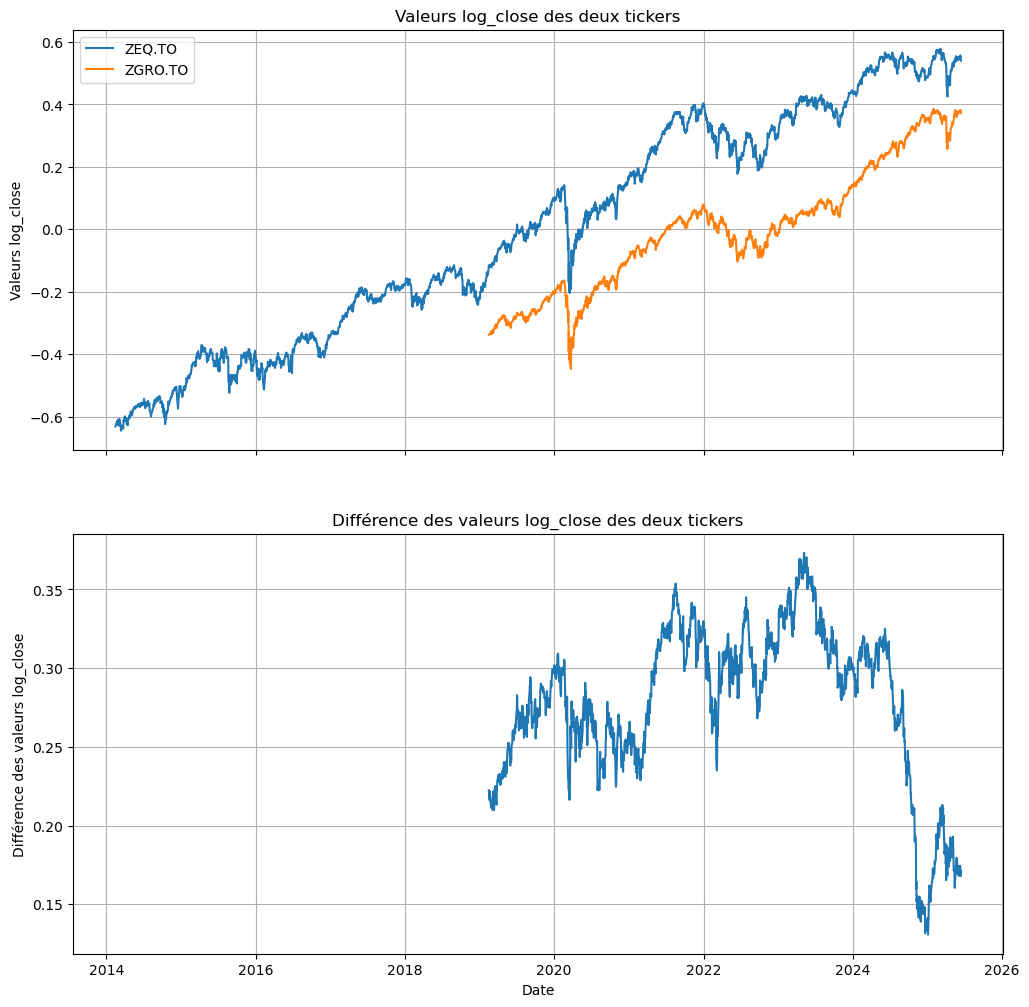

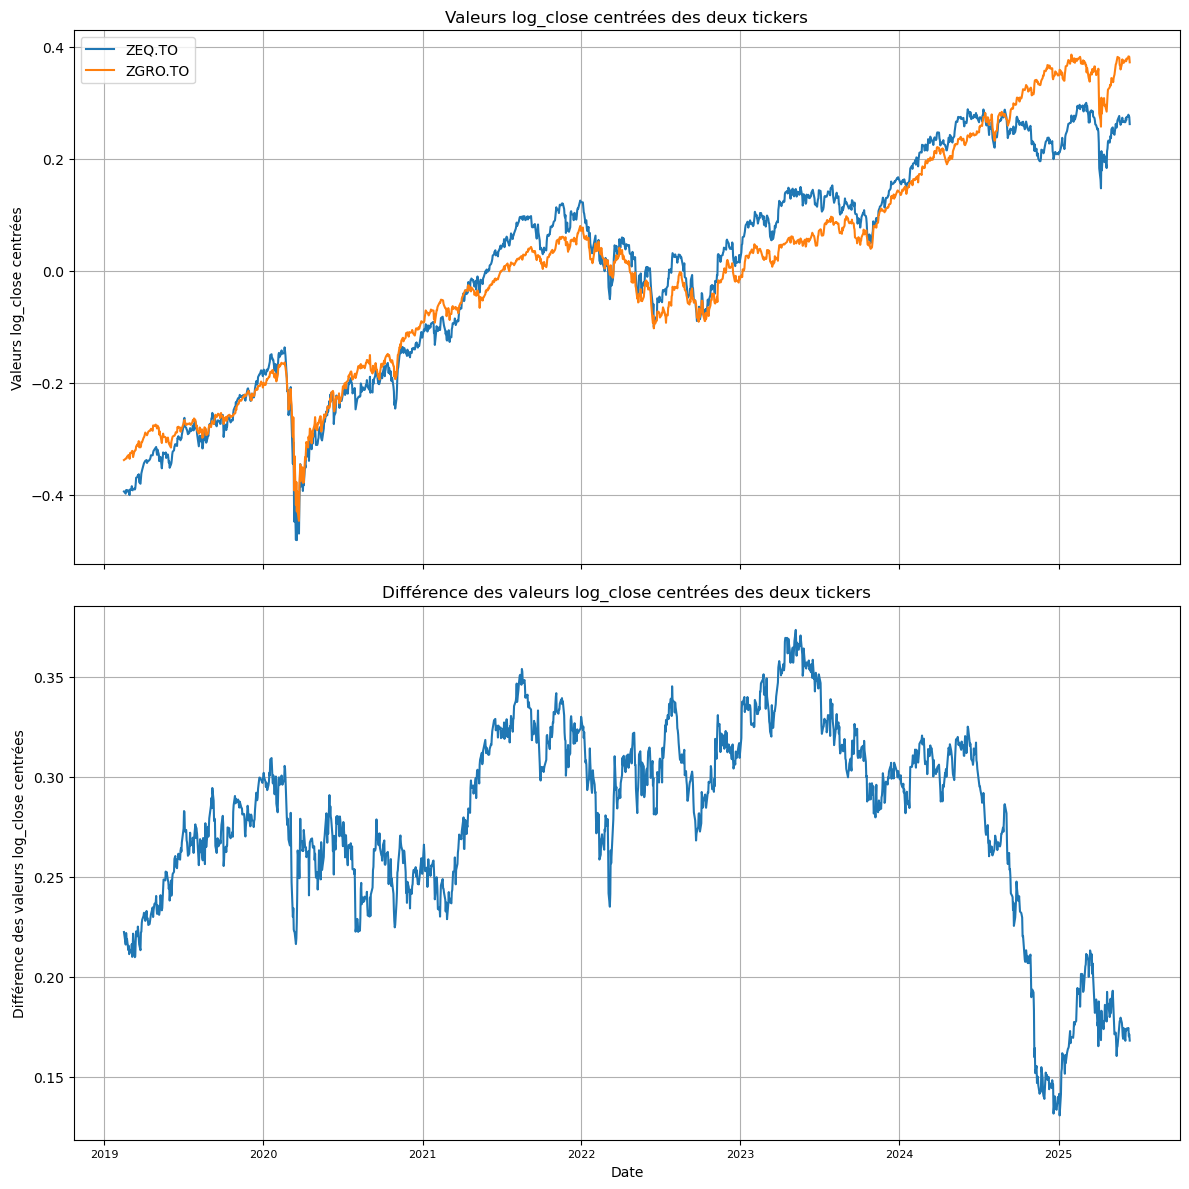

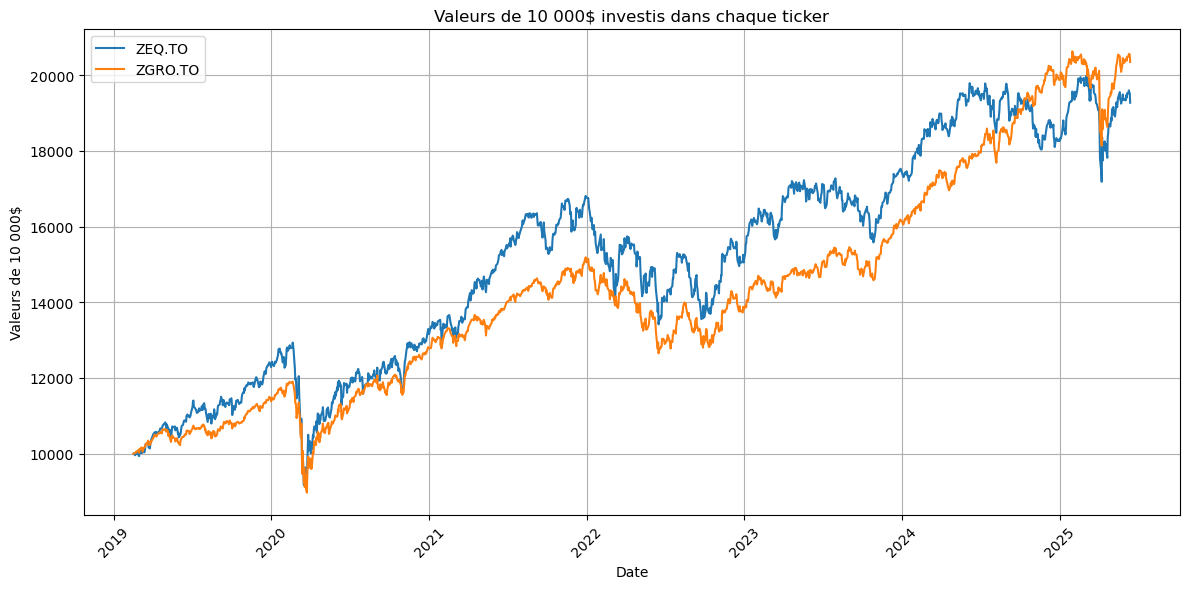

01:24:10.875 |  Evolution sur l'intervalle commun
01:24:10.877 |  ZEQ.TO: 10.09 %/an
01:24:10.878 |  ZGRO.TO: 10.32 %/an


In [5]:
# Plot 1: Show both tickers' log_close values over time (full available range)
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize = [12,12])  # Create a figure with 2 subplots sharing the x-axis
# Plot the first ticker's log_close values (all dates)
ax[0].plot(tbl1['plot_date'], tbl1['log_close'], label=tickers[0])
# Plot the second ticker's log_close values (all dates)
ax[0].plot(tbl2['plot_date'], tbl2['log_close'], label=tickers[1])
# Plot the difference between the two tickers' log_close values (only on common dates)
ax[1].plot(tbl1['plot_date'][keep1], tbl1['log_close'][keep1] - tbl2['log_close'][keep2])
# Add a legend to the first subplot
ax[0].legend()
ax[0].grid()
ax[1].grid()
ax[0].set_title('Valeurs log_close des deux tickers')
ax[1].set_title('Différence des valeurs log_close des deux tickers')
ax[0].set_ylabel('Valeurs log_close')
ax[1].set_ylabel('Différence des valeurs log_close')
ax[1].set_xlabel('Date')
# Display the plot
plt.show()

# Plot 2: Show both tickers' centered log_close values and their difference (only on common dates)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize = [12,12], sharex=True)  # Create a new figure with 2 subplots
# Plot the first ticker's centered log_close values (mean subtracted, only common dates)
ax[0].plot(
    tbl1['plot_date'][keep1],
    tbl1['log_close'][keep1] - np.mean(tbl1['log_close'][keep1]),
    label=tickers[0]
)
# Plot the second ticker's centered log_close values (mean subtracted, only common dates)
ax[0].plot(
    tbl2['plot_date'][keep2],
    tbl2['log_close'][keep2] - np.mean(tbl2['log_close'][keep2]),
    label=tickers[1]
)
# Plot the difference between the two tickers (only on common dates)
ax[1].plot(
    tbl1['plot_date'][keep1],
    tbl1['log_close'][keep1] - tbl2['log_close'][keep2]
)
# Add a legend to the first subplot
ax[0].legend()
# Change the font size of the x-axis tick labels for both subplots for better readability
for tick in ax[0].get_xticklabels():
    tick.set_fontsize(8)
for tick in ax[1].get_xticklabels():
    tick.set_fontsize(8)
# Display the plot

ax[0].grid()
ax[1].grid()
ax[0].set_title('Valeurs log_close centrées des deux tickers')
ax[1].set_title('Différence des valeurs log_close centrées des deux tickers')
ax[0].set_ylabel('Valeurs log_close centrées')
ax[1].set_ylabel('Différence des valeurs log_close centrées')
ax[1].set_xlabel('Date')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


fig, ax = plt.subplots(figsize=(12, 6))  # Create a new figure for the next plot
ax.plot(
    tbl1['plot_date'][keep1],
    1e4*np.exp(tbl1['log_close'][keep1] - (tbl1['log_close'][keep1][0])),
    label=tickers[0]
)
ax.plot(
    tbl2['plot_date'][keep2],
    1e4*np.exp(tbl2['log_close'][keep2] - (tbl2['log_close'][keep2][0])),
    label=tickers[1]
)
plt.grid()
ax.set_title('Valeurs de 10 000$ investis dans chaque ticker')
ax.set_ylabel('Valeurs de 10 000$')
ax.set_xlabel('Date')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.legend()
plt.show()



# Print the evolution (trend) of each ticker on the common interval
bt.printc("Evolution sur l'intervalle commun")
# Fit a linear trend (slope) to the first ticker's log_close values over time (common dates, time in years)
fit = np.polyfit(tbl1['mjd'][keep1] / 365.24, tbl1['log_close'][keep1], 1)
bt.printc(f'{tickers[0]}: {fit[0]*100:.2f} %/an')  # Print the slope for the first ticker
# Fit a linear trend (slope) to the second ticker's log_close values over time (common dates, time in years)
fit = np.polyfit(tbl2['mjd'][keep2] / 365.24, tbl2['log_close'][keep2], 1)
bt.printc(f'{tickers[1]}: {fit[0]*100:.2f} %/an')  # Print the slope for the second ticker

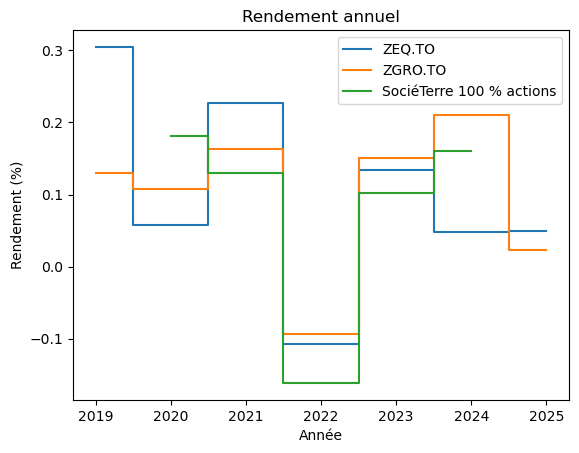

01:24:11.089 |  Moyenne et écart type
01:24:11.093 |  moyenne ZEQ.TO, mu 10.20%, sigma 12.49%
01:24:11.093 |  moyenne ZGRO.TO, mu 9.86%, sigma 9.47%
01:24:11.094 |  Valeurs pour la période 2019-2025
01:24:11.098 |  moyenne ZEQ.TO, mu 10.20%, sigma 12.49%
01:24:11.098 |  moyenne ZGRO.TO, mu 9.86%, sigma 9.47%
01:24:11.099 |  moyenne SociéTerre, mu 8.24%, sigma 12.48%


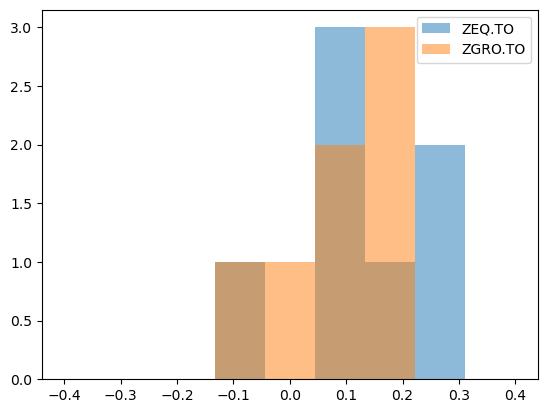

In [6]:
# Compute unique years present in tbl1 for the dates where keep1 is True (i.e., common dates)
uyrs1 = np.unique(tbl1['year'][keep1])
# Initialize an array to store annual log returns for ticker 1
avg1 = np.zeros_like(uyrs1, dtype=float)
# Loop over each unique year for ticker 1
for i, uyr in enumerate(uyrs1):
    # For the current year, extract the first and last log_close value
    v1, v2 = tbl1[tbl1['year'] == uyr]['log_close'][[0, -1]]
    # Compute the log return for the year and store it
    avg1[i] = v2 - v1

# Repeat the same process for ticker 2
uyrs2 = np.unique(tbl2['year'][keep2])  # Unique years for ticker 2 (on common dates)
avg2 = np.zeros_like(uyrs2, dtype=float)  # Array for annual log returns
for i, uyr in enumerate(uyrs2):
    v1, v2 = tbl2[tbl2['year'] == uyr]['log_close'][[0, -1]]
    avg2[i] = v2 - v1

# --- PLOTTING ANNUAL RETURNS AS STEP PLOTS ---
# Plot annual log returns for ticker 1 as a step plot
plt.step(uyrs1, avg1, where='mid', label=tickers[0])
# Plot annual log returns for ticker 2 as a step plot
plt.step(uyrs2, avg2, where='mid', label=tickers[1])

# Add reference data for SociéTerre 100 % actions (manually entered)
vv = [2024, 2023, 2022, 2021, 2020]  # Years for SociéTerre
rate = [16.09, 10.15, -16.12, 12.94, 18.16]  # Annual returns in percent
rate = np.array(rate) / 100  # Convert percent to fraction for plotting
# Plot SociéTerre returns as a step plot
plt.step(vv, rate, where='mid', label='SociéTerre 100 % actions')
plt.title('Rendement annuel')  # Set plot title
plt.xlabel('Année')            # X-axis label
plt.ylabel('Rendement (%)')    # Y-axis label

plt.legend()                   # Show legend
plt.show()                     # Display the plot

# --- STATISTICS: MEAN AND STANDARD DEVIATION ---
bt.printc("Moyenne et écart type")
# Compute mean and std of annual returns for ticker 1 (convert to percent)
mu1 = np.mean(avg1) * 100
sig1 = np.std(avg1) * 100
# Compute mean and std for ticker 2
mu2 = np.mean(avg2) * 100
sig2 = np.std(avg2) * 100
# Print results for both tickers
bt.printc(f'moyenne {tickers[0]}, mu {mu1:.2f}%, sigma {sig1:.2f}%')
bt.printc(f'moyenne {tickers[1]}, mu {mu2:.2f}%, sigma {sig2:.2f}%')

# --- STATISTICS FOR 2019-2025 PERIOD ONLY ---
bt.printc("Valeurs pour la période 2019-2025")
# Create boolean masks for years >= 2019 for both tickers
g1 = uyrs1 >= 2019
g2 = uyrs2 >= 2019

# Compute mean and std for ticker 1, 2019-2025
mu1 = np.mean(avg1[g1]) * 100
sig1 = np.std(avg1[g1]) * 100
# Compute mean and std for ticker 2, 2019-2025
mu2 = np.mean(avg2[g2]) * 100
sig2 = np.std(avg2[g2]) * 100
# Print results for both tickers for this period
bt.printc(f'moyenne {tickers[0]}, mu {mu1:.2f}%, sigma {sig1:.2f}%')
bt.printc(f'moyenne {tickers[1]}, mu {mu2:.2f}%, sigma {sig2:.2f}%')

# --- STATISTICS FOR SociéTerre REFERENCE ---
# Compute mean and std for SociéTerre reference returns (in percent)
mu = np.mean(rate) * 100
sig = np.std(rate) * 100
bt.printc(f'moyenne SociéTerre, mu {mu:.2f}%, sigma {sig:.2f}%')

# --- HISTOGRAMS OF ANNUAL RETURNS ---
# Plot histogram of annual returns for ticker 1
plt.hist(avg1, bins=9, range=[-.4, .4], alpha=0.5, label=tickers[0])
# Plot histogram of annual returns for ticker 2
plt.hist(avg2, bins=9, range=[-.4, .4], alpha=0.5, label=tickers[1])

plt.legend()   # Show legend
plt.show()     # Display the histogram